In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
mnist.load_data()
print('success')

success


In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Lambda, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras import backend as K

In [230]:
# set const
batch_size = 128
num_classes = 10
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
def make_dataset(img_rows, img_cols, num_classes):
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return x_train, x_test, y_train, y_test, input_shape

### define and fit model with L2 softmax Loss

In [231]:
def make_model(input_shape, num_classes, alpha=0.3):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    # l2 softmax
    model.add(Dense(128, activation='linear', 
                                    activity_regularizer=regularizers.l2(alpha)
                   ))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [232]:
'''
Trains a simple convnet on the MNIST dataset.
'''

x_train, x_test, y_train, y_test, input_shape = make_dataset(img_rows, img_cols, num_classes)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = make_model(input_shape, num_classes, alpha=0.01)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [233]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 158s 3ms/step - loss: 1.3550 - acc: 0.9204 - val_loss: 0.7465 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.5963 - acc: 0.9813 - val_loss: 0.4743 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.4211 - acc: 0.9868 - val_loss: 0.3612 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3436 - acc: 0.9898 - val_loss: 0.3172 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2975 - acc: 0.9917 - val_loss: 0.2771 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2665 - acc: 0.9931 - val_loss: 0.2570 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2438 - acc: 0.9940 - val_loss: 0.2435 - 

In [254]:
model.save_weights("model_L2softmaxLoss.h5")

### define and fit base model

In [ ]:
def make_basemodel(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [234]:
basemodel = make_basemodel(input_shape, num_classes)

basemodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

basemodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = basemodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1838 - acc: 0.9447 - val_loss: 0.0636 - val_acc: 0.9800
Epoch 2/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0600 - acc: 0.9817 - val_loss: 0.0520 - val_acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0458 - acc: 0.9858 - val_loss: 0.0400 - val_acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0371 - acc: 0.9882 - val_loss: 0.0379 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0321 - acc: 0.9902 - val_loss: 0.0376 - val_acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0336 - 

In [255]:
basemodel.save_weights("basemodel.h5")

# make metric model

In [71]:
def cosine_distance(inputs):
    x1, x2 = inputs
    x1 = K.l2_normalize(x1, axis=-1)
    x2 = K.l2_normalize(x2, axis=-1)
    return K.sum(x1 * x2, axis=-1, keepdims=True)

In [173]:
def make_metric_model(base_model):
    layer_name = base_model.layers[-2].name
    base_model.layers[-2].activity_regularizer = None

    x1_input = Input(shape=base_model.input.shape[1:].as_list())
    x1 = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)(x1_input)

    x2_input = Input(shape=base_model.input.shape[1:].as_list())
    x2 = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)(x2_input)

    distance = Lambda(cosine_distance)([x1, x2])
    model = Model(inputs=[x1_input, x2_input], outputs=distance)

    return model

In [235]:
# make metric model with L2 softmax Loss
metric_model= make_metric_model(model)

In [175]:
metric_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
model_41 (Model)                (None, 128)          1198592     input_35[0][0]                   
__________________________________________________________________________________________________
model_42 (Model)                (None, 128)          1198592     input_36[0][0]                   
__________________________________________________________________________________________________
lambda_10 

In [236]:
# make metric model  with base model
metric_basemodel= make_metric_model(basemodel)

In [253]:
metric_basemodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_42 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
model_50 (Model)                (None, 128)          1198592     input_41[0][0]                   
__________________________________________________________________________________________________
model_51 (Model)                (None, 128)          1198592     input_42[0][0]                   
__________________________________________________________________________________________________
lambda_13 

### check identity map

In [176]:
dist = metric_model.predict([x_test[:1], x_test[:1]])

In [177]:
dist[0].shape

(1,)

In [178]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [179]:
dist_with_diff = metric_model.predict([x_test[:1], x_test[1:2]])

In [180]:
dist_with_diff

array([[-0.10452893]], dtype=float32)

# make test dataset

In [244]:
def metrics(y_pred, y_test, th=0.5):
    """calculation of precission and recall"""
    corr = np.sum((y_pred > th).astype(np.float32) * y_test)
    precission = corr / np.sum(y_test)
    recall = corr / np.sum((y_pred > th).astype(np.float32))
    return precission, recall

In [249]:
def calc_metrics(x_test, y_test, metric_model):
    # new label: same label=1 or not=0
    y_test_match = np.sum(y_test[:-1] * y_test[1:], axis=-1)
    
    # the number of same label combination
    print("the number of same label: ", np.sum(y_test_match))

    y_pred_match = metric_model.predict([x_test[:-1], x_test[1:]])
    y_pred_match = y_pred_match.reshape(-1)

    result = [metrics(y_pred_match, y_test_match, th=th) for th in [0.05*f for f in range(20)]]
    precission = [f for f, g in result]
    recall = [g for f, g in result]
    return precission, recall

In [250]:
# calculation of precission and recall on base model
baseprecission, baserecall = calc_metrics(x_test, y_test, metric_basemodel)

the number of same label:  845.0


In [251]:
# calculation of precission and recall on model with L2 softmax Loss
precission, recall = calc_metrics(x_test, y_test, metric_model)

the number of same label:  845.0


## plot PR-curve
model with L2 softmax Loss suits on metric learning

/Users/tokusumi/.local/share/virtualenvs/Work-V_ROlG8b/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


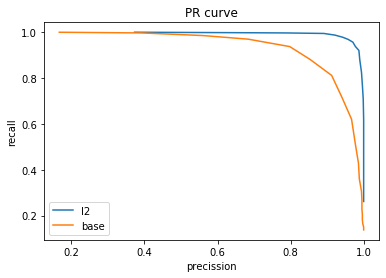

In [252]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()

ax = fig.add_subplot(1,1,1)


ax.plot(precission,recall, label='l2')
ax.plot(baseprecission, baserecall, label='base')

ax.set_title('PR curve')
ax.set_xlabel('precission')
ax.set_ylabel('recall')
plt.legend()
fig.show()